In [ ]:
import pandas as pd
import math
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label


class DecisionTree:
    def __init__(self):
        self.root = None
    
    def fit(self, X, y):
        data = pd.concat([X, y], axis=1)
        self.root = self._build_tree(data)
    
    def predict(self, X):
        return X.apply(lambda x: self._classify(x, self.root), axis=1)
    
    def _build_tree(self, data):
        n_samples, n_features = data.shape
        n_labels = len(data.iloc[:, -1].unique())

        if n_labels == 1:
            return Node(label=data.iloc[:, -1].iloc[0])
        
        if n_samples == 0:
            return None
        
        best_feature, best_threshold = self._get_best_split(data, n_features)

        left_data = data[data[best_feature] <= best_threshold]
        right_data = data[data[best_feature] > best_threshold]

        left_subtree = self._build_tree(left_data)
        right_subtree = self._build_tree(right_data)

        return Node(best_feature, best_threshold, left_subtree, right_subtree)
    
    def _get_best_split(self, data, n_features):
        best_feature, best_threshold = None, None
        max_gain = -1

        for feature in data.columns[:-1]:
            thresholds = data[feature].unique()
            for threshold in thresholds:
                left_data = data[data[feature] <= threshold]
                right_data = data[data[feature] > threshold]

                if left_data.shape[0] == 0 or right_data.shape[0] == 0:
                    continue

                gain = self._information_gain(left_data, right_data)

                if gain > max_gain:
                    max_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold
    
    def _information_gain(self, left_data, right_data):
        p = left_data.shape[0] / (left_data.shape[0] + right_data.shape[0])
        entropy_parent = self._entropy(left_data.iloc[:, -1]) + self._entropy(right_data.iloc[:, -1])
        entropy_children = p * self._entropy(left_data.iloc[:, -1]) + (1-p) * self._entropy(right_data.iloc[:, -1])
        return entropy_parent - entropy_children
    
    def _entropy(self, labels):
        n_labels = len(labels)
        if n_labels <= 1:
            return 0
        counts = labels.value_counts(normalize=True)
        entropy = -sum(counts * np.log2(counts))
        return entropy
    
    def _classify(self, sample, node):
        if node.label is not None:
            return node.label
        if sample[node.feature] <= node.threshold:
            return self._classify(sample, node.left)
        else:
            return self._classify(sample, node.right)


In [ ]:
import pandas as pd

df = pd.read_csv("PlayTennis.csv")
X = df.drop('play', axis=1)
y = df['play']

tree = DecisionTree()
tree.fit(X, y)

# Make predictions on new data
new_data = pd.DataFrame({
    'outlook': ['sunny', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy'],
    'temp': ['mild', 'hot', 'cool', 'hot', 'mild', 'cool'],
    'humidity': ['normal', 'normal', 'normal', 'high', 'high', 'normal'],
    'windy': [False, True, True, False, True, False]
})

predictions = tree.predict(new_data)
print(predictions)


0    yes
1    yes
2     no
3     no
4    yes
5    yes
dtype: object


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [11]:
from sklearn.tree import export_graphviz

f = open("/content/iris_tree.dot", 'w')
export_graphviz(
        tree_clf,
        out_file=f,  # path where you want it to output
        feature_names=iris.feature_names[2:],
        class_names = iris.target_names,
        rounded=True,
        filled=True
)

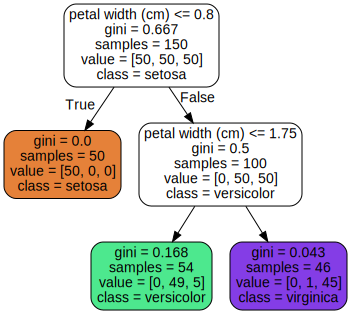

In [13]:
from graphviz import Source
Source.from_file("iris_tree.dot")

Accuracy on training set for DTC1: 0.921
Accuracy on training set for DTC5: 0.996
Accuracy on testing set for DTC1: 0.895
Accuracy on testing set for DTC5: 0.939


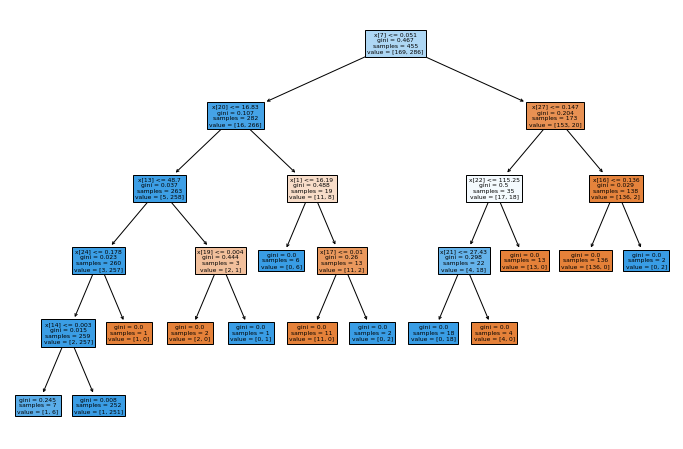

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train a decision tree classifier with maximum depth of 1
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc1.fit(X_train, y_train)

# Train a decision tree classifier with maximum depth of 5
dtc5 = DecisionTreeClassifier(max_depth=5)
dtc5.fit(X_train, y_train)

# Predict on the training and testing sets for both classifiers
y_pred_train_dtc1 = dtc1.predict(X_train)
y_pred_train_dtc5 = dtc5.predict(X_train)
y_pred_test_dtc1 = dtc1.predict(X_test)
y_pred_test_dtc5 = dtc5.predict(X_test)

# Calculate the accuracy scores
acc_train_dtc1 = accuracy_score(y_train, y_pred_train_dtc1)
acc_train_dtc5 = accuracy_score(y_train, y_pred_train_dtc5)
acc_test_dtc1 = accuracy_score(y_test, y_pred_test_dtc1)
acc_test_dtc5 = accuracy_score(y_test, y_pred_test_dtc5)

print(f"Accuracy on training set for DTC1: {acc_train_dtc1:.3f}")
print(f"Accuracy on training set for DTC5: {acc_train_dtc5:.3f}")
print(f"Accuracy on testing set for DTC1: {acc_test_dtc1:.3f}")
print(f"Accuracy on testing set for DTC5: {acc_test_dtc5:.3f}")

# Plot the decision tree for visualization
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(dtc5, filled=True, ax=ax)
plt.show()


<ipython-input-20-4578008b957c>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data = data.replace('?', pd.np.nan)


Mean squared error on training set: 1066815.729
Mean squared error on testing set: 4908975.873


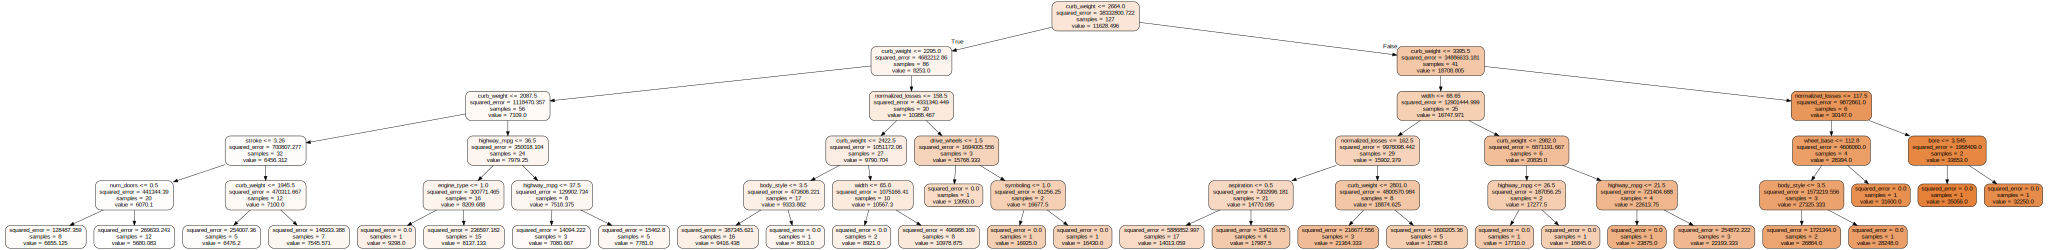

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import graphviz

# Load the car prediction dataset from URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = pd.read_csv(url, header=None)

# Set column names for the dataset
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
                'num_doors', 'body_style', 'drive_wheels', 'engine_location',
                'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
                'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
                'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
data.columns = column_names

# Replace ? with NaN
data = data.replace('?', pd.np.nan)

# Drop rows with missing values
data = data.dropna()

# Convert categorical features to numerical using label encoder
le = LabelEncoder()
data['make'] = le.fit_transform(data['make'])
data['fuel_type'] = le.fit_transform(data['fuel_type'])
data['aspiration'] = le.fit_transform(data['aspiration'])
data['num_doors'] = le.fit_transform(data['num_doors'])
data['body_style'] = le.fit_transform(data['body_style'])
data['drive_wheels'] = le.fit_transform(data['drive_wheels'])
data['engine_location'] = le.fit_transform(data['engine_location'])
data['engine_type'] = le.fit_transform(data['engine_type'])
data['num_cylinders'] = le.fit_transform(data['num_cylinders'])
data['fuel_system'] = le.fit_transform(data['fuel_system'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

# Train a decision tree regressor with maximum depth of 5
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)

# Predict on the training and testing sets
y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean squared error on training set: {mse_train:.3f}")
print(f"Mean squared error on testing set: {mse_test:.3f}")

# Generate a visualization of the decision tree
dot_data = export_graphviz(dtr, out_file=None, feature_names=data.columns[:-1], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("car_prediction_decision_tree", format='png', cleanup=True)
graph


